In [1]:
from faker import Faker
import numpy as np
from datetime import datetime, timedelta

Constantes: tamanho do Mock e instância do Faker

In [2]:
USER_COUNT = 5291
TRANSFER_COUNT = 5291 * 3
fake = Faker()

# Dados de Usuário

Gerando IDs

In [162]:
users = list()
for i in range(USER_COUNT):
    new_user = dict()
    new_user['id'] = fake.uuid4()
    users.append(new_user)

Gerando *created_at* e *updated_at*

Utilizando distribuição ponderada, priorizando os meses 2, 3 e 4.

(array([ 646.,    0.,  833.,    0., 1031.,    0., 1343.,    0.,  599.,
         839.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

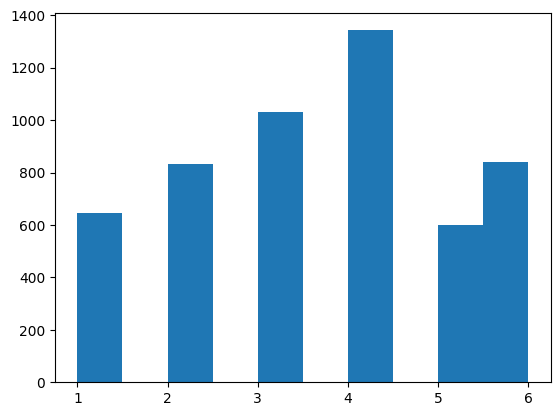

In [163]:
import numpy as np
from matplotlib import pyplot as plt

available = np.array([1, 2, 3, 4, 5, 6])
weights = np.array([1/6, 1/5, 1/4, 1/3, 1/7, 1/5])
weights = weights / np.sum(weights)
months = np.random.choice(available, p=weights, size=USER_COUNT)
plt.hist(months)

Gerando dias. É interessante que haja uma tendência de *onboardings* no início do mês.

In [164]:
from datetime import datetime
import calendar

for i in range(USER_COUNT):
    month = months[i]
    _, day_end = calendar.monthrange(2023, month)
    start_date = datetime(2023, month, 1)
    end_date = datetime(2023, month, day_end)
    new_c_at = fake.date_time_between(start_date=start_date, end_date=end_date)
    users[i]['created_at'] = new_c_at.isoformat()
    new_u_at = fake.date_time_between(start_date=new_c_at, end_date=datetime(2023, 7, 1))
    users[i]['updated_at'] = new_u_at.isoformat()

Gerando datas de nascimento

Ano mínimo: 1954
Ano máximo: 2005


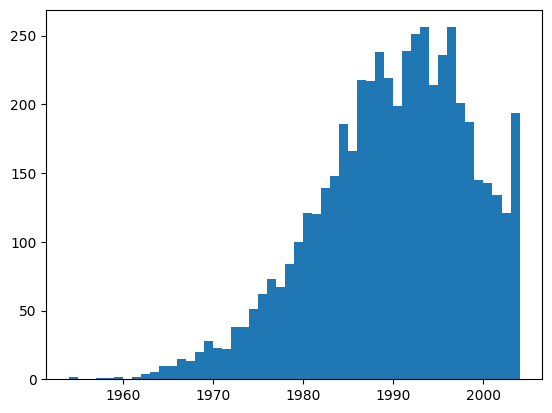

In [165]:
from matplotlib import pyplot as plt
from scipy.stats import skewnorm

random_years = skewnorm.rvs(a=-1.25,loc=1998, scale=12, size=USER_COUNT)
while True:
  random_years = np.round(random_years, 0).astype(int)
  outside_interval = np.argwhere(random_years > 2005).flatten()
  if (outside_interval.size == 0):
    break
  random_years[outside_interval] = skewnorm.rvs(a=-1.25,loc=1998, scale=12, size=len(outside_interval))
# Count the number of users created in each year
# Year is x axis, count is y axis
minimum_year = np.min(random_years)
maximum_year = np.max(random_years)
print(f'Ano mínimo: {minimum_year}')
print(f'Ano máximo: {maximum_year}')
plt.hist(random_years, bins=range(minimum_year, maximum_year))
plt.show()

In [166]:
for i in range(USER_COUNT):
    random_date = fake.date(pattern='%m-%d')
    random_date_with_year = f'{random_years[i]}-{random_date}'
    users[i]['birthday'] = random_date_with_year

In [167]:
import pandas as pd

pd.DataFrame(users).to_csv('users.csv', index=False)

# Endereços

Utilizando .csv de municipios contidos [aqui](http://blog.mds.gov.br/redesuas/wp-content/uploads/2018/06/Lista_Munic%C3%ADpios_com_IBGE_Brasil_Versao_CSV.csv)

In [168]:
# Renomeie o CSV
municipios = pd.read_csv('municipios.csv', sep=';')
# Ignorando duas colunas
municipios = municipios.drop(columns=['ConcatUF+Mun', 'Unnamed: 9']).sort_values(by=['População 2010'], ascending=False)
# Ignorando munícipios sem informação de população
municipios = municipios.dropna(subset=['População 2010'])
display(municipios.head(20))

,IBGE,IBGE7,UF,Município,Região,População 2010,Porte,Capital
3827,355030,3550308,SP,São Paulo,Região Sudeste,11253503.0,Metrópole,Capital
3240,330455,3304557,RJ,Rio de Janeiro,Região Sudeste,6320446.0,Metrópole,Capital
2160,292740,2927408,BA,Salvador,Região Nordeste,2675656.0,Metrópole,Capital
5567,530010,5300108,DF,Brasília,Região Centro-Oeste,2570160.0,Metrópole,Capital
947,230440,2304400,CE,Fortaleza,Região Nordeste,2452185.0,Metrópole,Capital
2307,310620,3106200,MG,Belo Horizonte,Região Sudeste,2375151.0,Metrópole,Capital
109,130260,1302603,AM,Manaus,Região Norte,1802014.0,Metrópole,Capital
4003,410690,4106902,PR,Curitiba,Região Sul,1751907.0,Metrópole,Capital
1594,261160,2611606,PE,Recife,Região Nordeste,1537704.0,Metrópole,Capital
4929,431490,4314902,RS,Porto Alegre,Região Sul,1409351.0,Metrópole,Capital


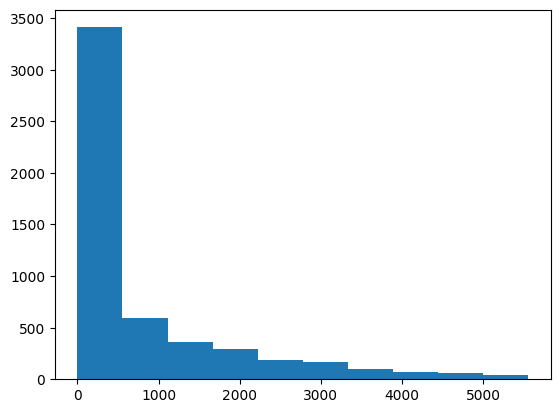

In [169]:
from matplotlib import pyplot as plt
import numpy as np

random_idx = np.random.choice(len(municipios), size=USER_COUNT, p=municipios['População 2010'].values / np.sum(municipios['População 2010'].values))
# Count the number of users created in each year
# Year is x axis, count is y axis
plt.hist(random_idx)
plt.show()

In [170]:
users_adresses = list()
for i in range(USER_COUNT):
    new_address = dict()
    new_address['owner_id'] = users[i]['id']
    new_address['city'] = municipios.iloc[random_idx[i]]['Município']
    new_address['state'] = municipios.iloc[random_idx[i]]['UF']
    users_adresses.append(new_address)

In [171]:
import pandas as pd

pd.DataFrame(users_adresses).to_csv('addresses.csv', index=False)

# Transferências

Nesse caso, não incluiremos ID de conta. Referenciaremos diretamente o usuário dono da conta.

Gerando valores

Valor mínimo: 0.02
Valor máximo: 5092.0


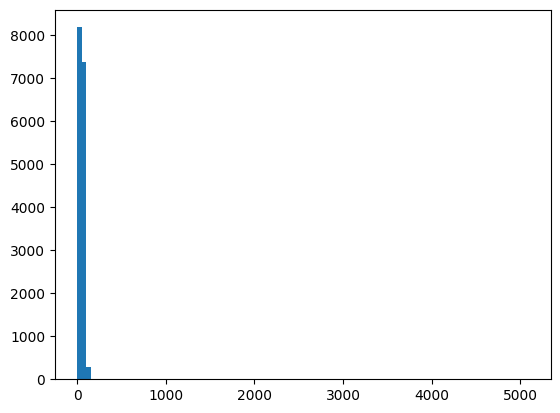

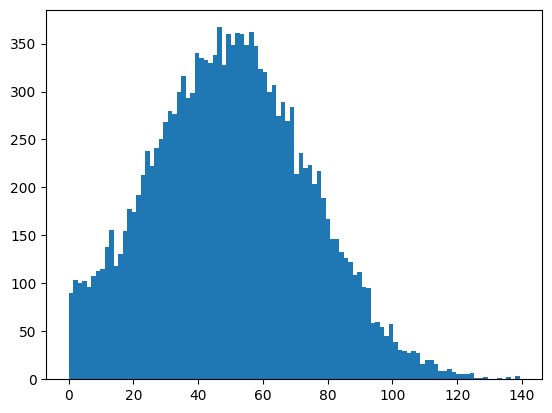

In [175]:
import numpy as np
from matplotlib import pyplot as plt

# Valores das transferências
values = np.random.normal(loc=50, scale=25, size=TRANSFER_COUNT - 25)
# Adicionando 25 outliers
values = np.append(values, np.random.normal(loc=3000, scale=1000, size=25))
# Valores negativos não fazem sentido nesse caso, aplicando módulo
values = np.abs(values)
# 2 casas decimais
values = np.round(values, 2)
print(f'Valor mínimo: {np.min(values)}')
print(f'Valor máximo: {np.max(values)}')
plt.hist(np.sort(values), bins=100)
plt.show()
plt.hist(np.sort(values)[:-25], bins=100)
plt.show()

Gerando horários de transferência

In [176]:
import numpy as np
from scipy.stats import skewnorm
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter


# Horários das transferências
# [0, 1440) -> Minutos após 00:00
# Considerando que a maioria será feita no horário de 16h
minutes = skewnorm.rvs(a=-0.5,loc=960, scale=240, size=TRANSFER_COUNT)
while True:
  minutes = np.round(minutes, 0).astype(int)
  minutes_outside_interval = np.argwhere((minutes < 0) | (minutes >= 1440)).flatten()
  if (minutes_outside_interval.size == 0):
    break
  minutes[minutes_outside_interval] = skewnorm.rvs(a=-0.5,loc=960, scale=240, size=len(minutes_outside_interval))
min_to_datetime = lambda min: f'{min // 60}:{min % 60}'
print(f'Valor mínimo: {np.min(minutes)}')
print(f'Valor máximo: {np.max(minutes)}')
print(f'Média: {np.mean(minutes)}')

Valor mínimo: 44
Valor máximo: 1438
Média: 870.08631008631


Vamos conferir para ver se faz sentido

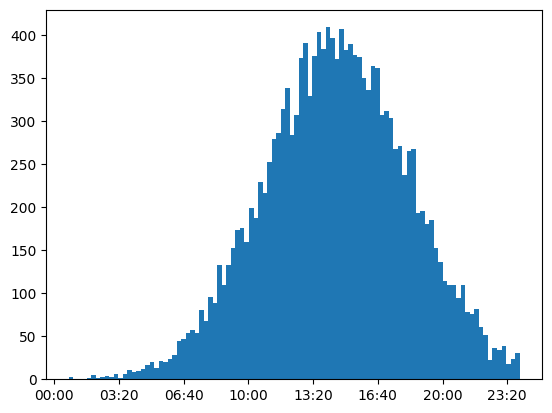

In [177]:
formatter = FuncFormatter(lambda min, _: f'{(int(min) // 60):02d}:{(int(min) % 60):02d}')
plt.gca().xaxis.set_major_formatter(formatter)
plt.hist(minutes, bins=100)
plt.show()

In [180]:
transfers = list()
# Transferência não precisa ter ID
# Apenas: Valor, status, created_at/updated_at e time_to_transfer (caso seja agendada)
# Precisa de um ID do usuário de origem e um ID do usuário de destino
# Esses são escolhidos aleatoriamente
for i in range(TRANSFER_COUNT):
    new_transfer = dict()
    # Usuários de origem e destino são aleatórios, podendo ser o mesmo
    # Lembre-se de que um mesmo usuário pode ter mais de uma conta!
    nt_id_from = np.random.choice(USER_COUNT)
    nt_id_to = np.random.choice(USER_COUNT)
    # Limite inferior do tempo para a transferência 
    user_from = users[nt_id_from]
    user_to = users[nt_id_to]
    # Toma-se como base o usuário com created_at mais recente
    lower_bound = datetime.fromisoformat(user_from['created_at']) if datetime.fromisoformat(
        user_from['created_at']) > datetime.fromisoformat(user_to['created_at']) else datetime.fromisoformat(user_to['created_at'])
    # Limite superior é 01/07/2023
    upper_bound = datetime(2023, 7, 1)
    nt_created_at: datetime = fake.date_time_between(
        start_date=lower_bound, end_date=upper_bound)
    # Sobrepondo hora e minuto usando distribuição gerada anteriormente
    nt_created_at = nt_created_at.replace(hour=minutes[i] // 60, minute=minutes[i] % 60)
    new_transfer['created_at'] = nt_created_at.isoformat()
    # Valor também utiliza distribuição
    new_transfer['value'] = values[i]
    nt_status = np.random.choice(
        ['FAILED', 'DONE', 'SCHEDULED'], p=[0.001, 0.6, 0.399])
    new_transfer['updated_at'] = nt_created_at.isoformat()
    if nt_status == 'SCHEDULED':
        # Limite inferior é o dia após a criação da transferência
        start_date = nt_created_at + timedelta(days=1)
        nt_time_to_transfer = fake.date_between(
            start_date=nt_created_at, end_date=upper_bound)
        new_transfer['time_to_transfer'] = nt_time_to_transfer.isoformat()
    else:
        new_transfer['time_to_transfer'] = None
    new_transfer['status'] = nt_status
    new_transfer['id_from'] = user_from['id']
    new_transfer['id_to'] = user_to['id']
    transfers.append(new_transfer)

In [181]:
import pandas as pd

pd.DataFrame(transfers).to_csv('transfers.csv', index=False)